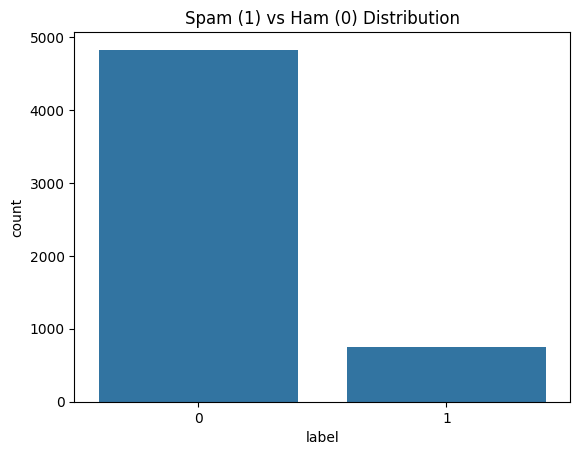

📊 Class Counts:
label
0    4825
1     747
Name: count, dtype: int64
📊 Naive Bayes Accuracy: 0.9623318385650225
📊 Logistic Regression Accuracy: 0.967713004484305

📄 Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115


📄 Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



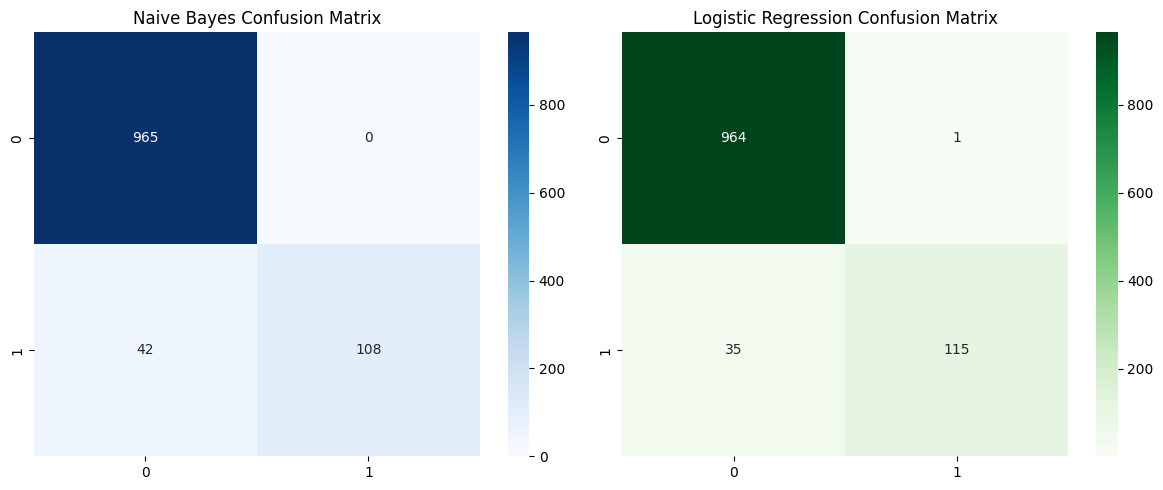

In [1]:
#import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\ML-INTERNSHIP\Task 4\spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']

# Encode labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

import seaborn as sns
import matplotlib.pyplot as plt

# Show class balance
sns.countplot(x='label', data=df)
plt.title("Spam (1) vs Ham (0) Distribution")
plt.show()

# print class counts
print("📊 Class Counts:")
print(df['label'].value_counts())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_pred = nb_model.predict(X_test_vec)

# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)
lr_pred = lr_model.predict(X_test_vec)

# Accuracy
print("📊 Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("📊 Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

# Classification Reports
print("\n📄 Naive Bayes Report:\n", classification_report(y_test, nb_pred))
print("\n📄 Logistic Regression Report:\n", classification_report(y_test, lr_pred))

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Naive Bayes Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Logistic Regression Confusion Matrix")

plt.tight_layout()
plt.show()
